# DECITION TREE (Tugas 6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier      # library algoritma Decision Tree
from sklearn.model_selection import train_test_split # library split data
from sklearn import metrics                          # library evaluation metrics
from sklearn.metrics import classification_report    # library laporan klasifikasi

In [11]:
dataset_url = "https://raw.githubusercontent.com/CAHYANIR/data/main/dataR2.csv"
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
%cd /content/drive/MyDrive/datamining/tugas/

/content/drive/MyDrive/datamining/tugas


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [13]:
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


In [14]:
print(df)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


In [15]:
X = df.iloc[:,0:9].values # Features
Y = df.iloc[:, 9].values  # Target variable

In [16]:
# Hasil pemisahan X dan Y
print(X.shape, '\n')
print(Y.shape)

(116, 9) 

(116,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # split menjadi 80% training set and 20% test set

In [18]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, y_train)

# Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=5,  random_state=25)
model_DT = model_DT.fit(X_train, y_train)

In [19]:
# hasil prediksi training set
y_pred_train_default = model_default.predict(X_train)

# hasil prediksi test set
y_pred_default = model_default.predict(X_test)

# Train set score
print("Train Accuracy   :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precission :", metrics.precision_score(y_train, y_pred_train_default))
print("Train Recall     :", metrics.recall_score(y_train, y_pred_train_default), '\n')

# Test set score
print("Test Accuracy   :", metrics.accuracy_score(y_test, y_pred_default))
print("Test Precission :", metrics.precision_score(y_test, y_pred_default))
print("Test Recall     :", metrics.recall_score(y_test, y_pred_default))

Train Accuracy   : 1.0
Train Precission : 1.0
Train Recall     : 1.0 

Test Accuracy   : 0.6666666666666666
Test Precission : 0.6666666666666666
Test Recall     : 0.6666666666666666


In [20]:
# hasil prediksi training set
y_pred_train = model_DT.predict(X_train)

# hasil prediksi test set
y_pred = model_DT.predict(X_test)

# Train set score
print("Train Accuracy   :", metrics.accuracy_score(y_train, y_pred_train))
print("Train Precission :", metrics.precision_score(y_train, y_pred_train))
print("Train Recall     :", metrics.recall_score(y_train, y_pred_train), '\n')

# Test set score
print("Test Accuracy   :", metrics.accuracy_score(y_test, y_pred))
print("Test Precission :", metrics.precision_score(y_test, y_pred))
print("Test Recall     :", metrics.recall_score(y_test, y_pred))

Train Accuracy   : 0.7608695652173914
Train Precission : 0.7142857142857143
Train Recall     : 0.75 

Test Accuracy   : 0.7916666666666666
Test Precission : 0.7692307692307693
Test Recall     : 0.8333333333333334


In [21]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
print(classification_report(y_test, y_pred, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.67      0.67      0.67        12
      Berpotensi diabetes       0.67      0.67      0.67        12

                 accuracy                           0.67        24
                macro avg       0.67      0.67      0.67        24
             weighted avg       0.67      0.67      0.67        24



Classification Report Model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.77      0.83      0.80        12
      Berpotensi diabetes       0.82      0.75      0.78        12

                 accuracy                           0.79        24
                macro avg       0.79      0.79      0.79        24
             weighted avg       0.79      0.79      0.79        24



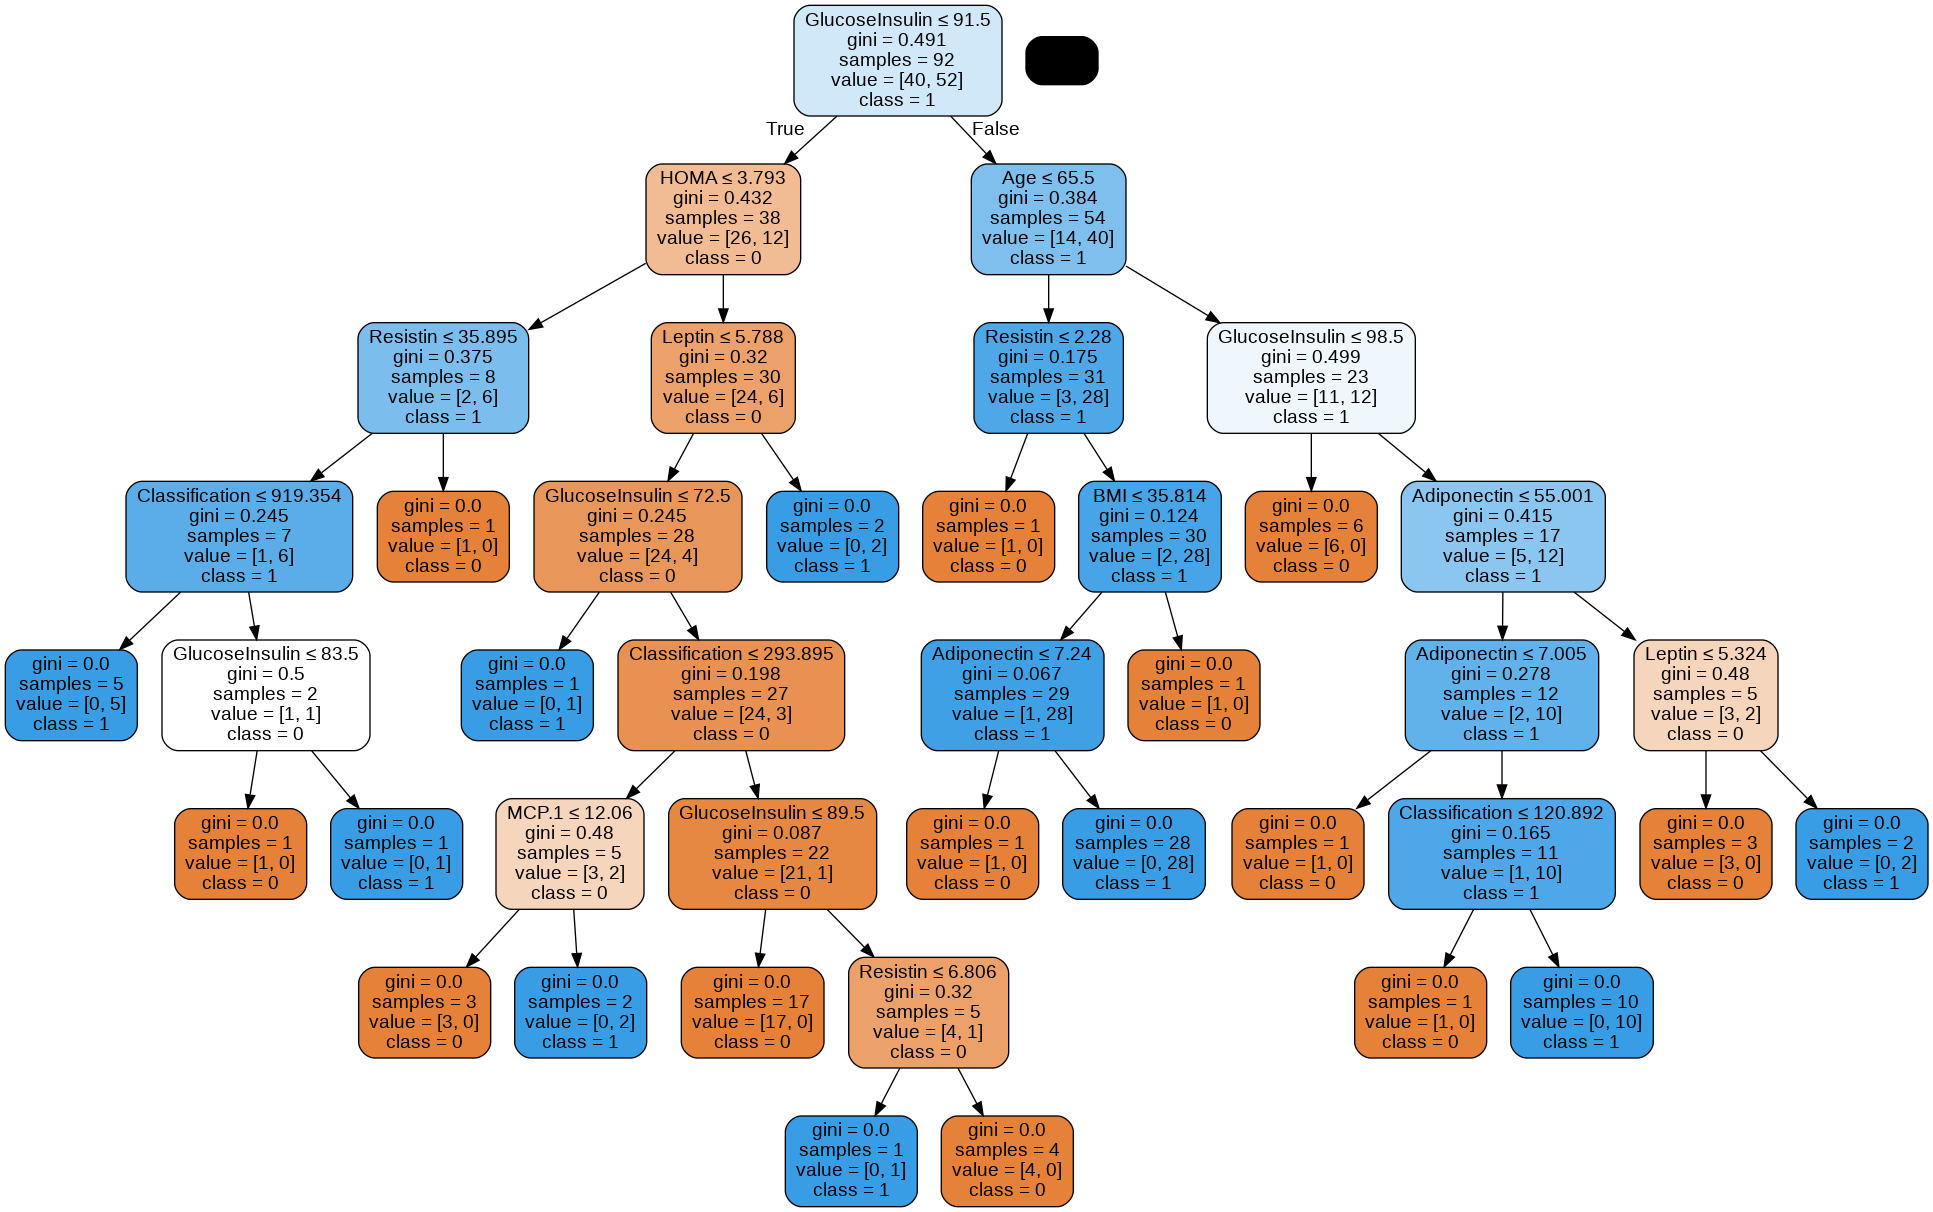

In [23]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Age','BMI','Glucose	Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_model_default.png')
Image(graph.create_png())

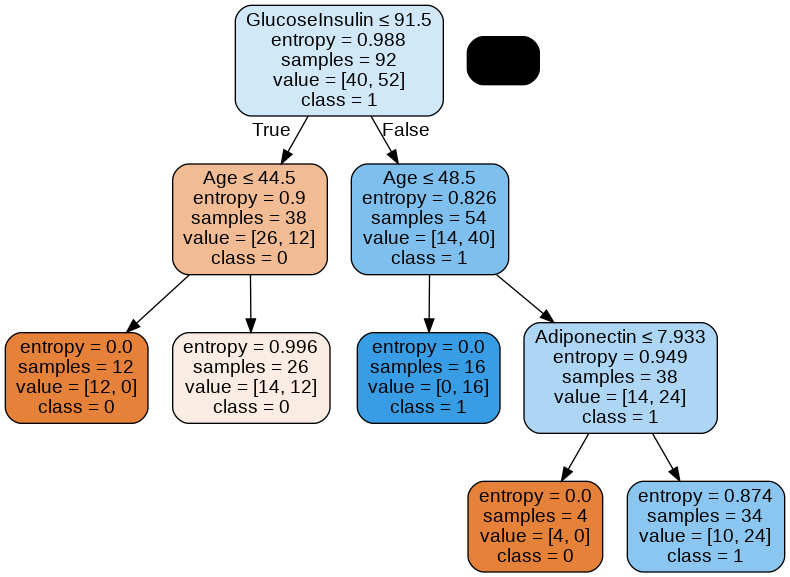

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Age','BMI','Glucose	Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Feature: Age Score:  0.08499218821799465 %
Feature: BMI Score:  0.03985853227232543 %
Feature: Glucose	Insulin Score:  0.3385408857854679 %
Feature: HOMA Score:  0.08450404858299594 %
Feature: Leptin Score:  0.11373626373626362 %
Feature: Adiponectin Score:  0.10552745429013174 %
Feature: Resistin Score:  0.1011056953798889 %
Feature: MCP.1 Score:  0.05307692307692306 %
Feature: Classification Score:  0.07865800865800864 %


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


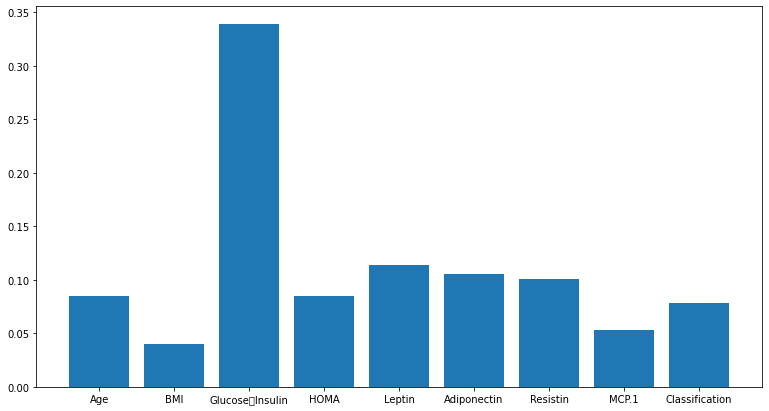

In [25]:
importance = model_default.feature_importances_ # khusus model dengan hyperparamter default

for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
 
# Membuat plit
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()